# Plot EV transport profiles based on RAMP-mobility

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
mpl.rcParams['svg.fonttype'] = 'none'

In [4]:
profiles = pd.read_csv('../data/transport/ev_profiles_ramp.csv.gz', index_col=[0, 1, 2], parse_dates=[0])

/cluster/work/apatt/brynmorp/miniconda/envs/euro-spores/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [30]:
df1 = profiles.plugin.unstack('country_code').droplevel('year')
df1 = df1.groupby([df1.index.date, df1.index.hour]).mean()

df2 = profiles.demand.div(profiles.demand.sum(level=['year', 'country_code'])).unstack('country_code').droplevel('year')
df2 = df2.groupby([df2.index.year, df2.index.weekofyear]).sum()

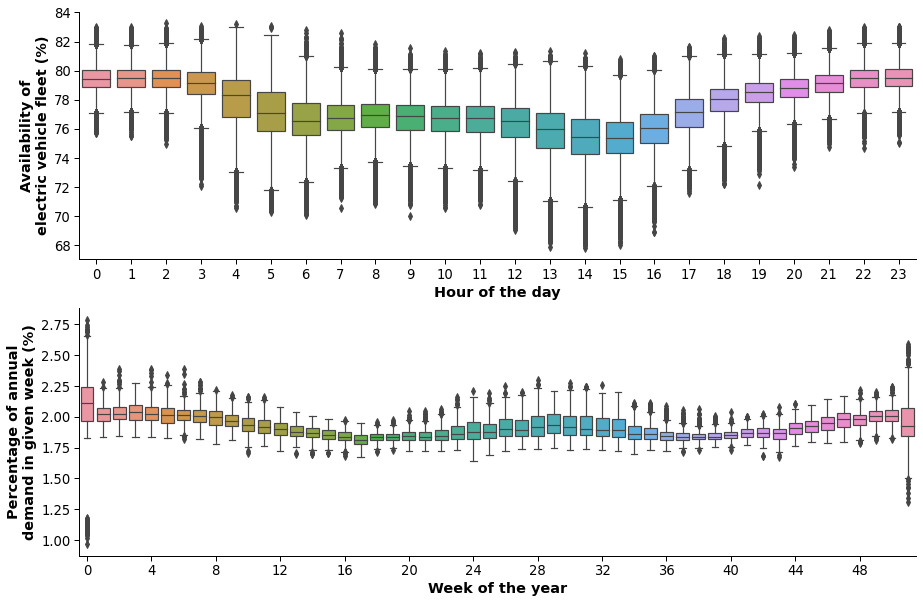

In [36]:
with sns.plotting_context("paper", font_scale=1.5):
    fig, ax = plt.subplots(2, 1, figsize=(15, 10))
    sns.boxplot(
        data=df1.stack().to_frame('Availability of\nelectric vehicle fleet (%)').mul(100).rename_axis(index=['date', 'hour', 'country_code']).reset_index(),
        x='hour',
        y='Availability of\nelectric vehicle fleet (%)',
        ax=ax[0]
    )
    sns.despine(ax=ax[0])
    ax[0].set_ylabel(ax[0].get_ylabel(), fontweight="bold")
    ax[0].set_xlabel("Hour of the day", fontweight="bold")
    
    sns.boxplot(
        data=df2.drop(53, level=1).stack().to_frame('Percentage of annual\ndemand in given week (%)').mul(100).rename_axis(index=['year', 'week', 'country_code']).reset_index(),
        x='week',
        y='Percentage of annual\ndemand in given week (%)',
        ax=ax[1]
    )
    sns.despine(ax=ax[1])
    ax[1].set_ylabel(ax[1].get_ylabel(), fontweight="bold")
    ax[1].set_xlabel("Week of the year", fontweight="bold")
    ax[1].set_xticks([i for i in range(52)][::4])
    ax[1].set_xticklabels([i for i in range(52)][::4])
fig.savefig('../build/figures/ev-transport-fluctuations.pdf', bbox_inches="tight")
fig.savefig('../build/figures/ev-transport-fluctuations.png', bbox_inches="tight")